******
## **Business Case: Wine Quality and Prices**
******

🎯 **Objetivo** : Construir un modelo predictivo que permita clasificar la calidad del vino al momento del embotellado y, con base en ello, establecer un precio más eficiente desde el inicio.

In [17]:
# Importar dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

- Cargar el dataset

In [18]:
# Cargar el dataset de calidad del vino tinto
ruta = r"C:/Users/abuen/OneDrive/00 - BUSINNESS INTELLIGENCE/MODULO_2/CURSO/proyecto_final_BI/winequality-red.csv"
df = pd.read_csv(ruta)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Obtenemos la descripción de los datos

In [19]:
# Descripción de los datos
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Obtenemos la información de los datos


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observaciones de ETL
- El dataset contiene **1599 registros** y 12 columnas, cada una representando una variable relacionada con las características físico-químicas del vino y su calidad.
- **No hay valores nulos**, ya que todas las columnas tienen exactamente **1599 valores no nulos**.
- La mayoría de las variables son de tipo float64, es decir, numéricas continuas. Solo la variable quality es de tipo entero (int64), lo cual tiene sentido porque representa una calificación discreta del vino.

**Informacion del dataset**

La siguiente tabla desglosa cómo se relaciona cada una de estas variables con el vino y cuál es la correlación que se espera que tengan. (Segun el Business Case)

| Variable                | Descripción                                                                 | Relación esperada |
|-------------------------|------------------------------------------------------------------------------|--------------------|
| fixed acidity           | Acidez no volátil, estable (tartárico, málico)                              | ➕                |
| volatile acidity        | Ácido acético; genera sabor avinagrado si es alto                           | ➖                |
| citric acid             | Conservante natural, aporta frescura y sabor                                 | ➕                |
| residual sugar          | Azúcar restante después de la fermentación                                   | ➖                |
| chlorides               | Sal; en exceso, perjudica el sabor                                           | ➖                |
| free sulfur dioxide     | Conservante que evita oxidación                                              | ❓                |
| total sulfur dioxide    | Suma de todos los SO₂                                                        | ➕                |
| density                 | Relacionada con azúcar y alcohol                                             | ❓                |
| pH                      | Inversamente relacionado con acidez                                          | ❓                |
| sulphates               | Conservante y estabilizador                                                  | ❓                |
| alcohol                 | Nivel alcohólico del vino                                                    | ➕                |


### **Analisis de Correlaciones**

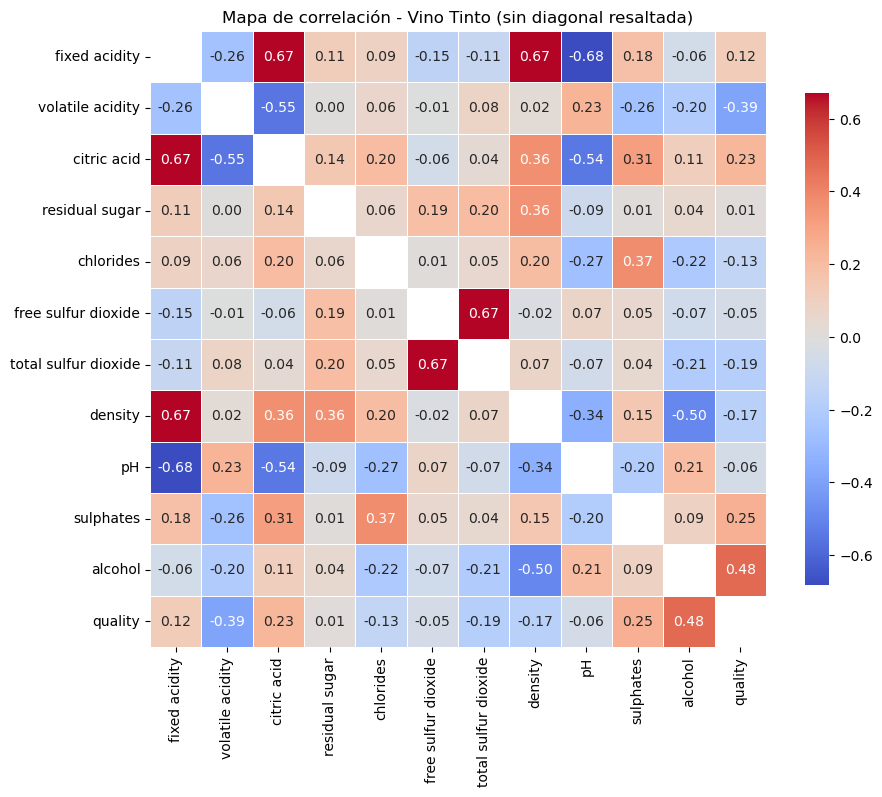

In [21]:
# Calculamos la correlación entre las variables numéricas
correlation_matrix = df.corr(numeric_only=True)

# Reemplace la diagonal con NaN para no mostrar valores de correlación de 1.0
# en el heatmap
np.fill_diagonal(correlation_matrix.values, np.nan)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8},
            mask=correlation_matrix.isnull())  # Opción para ocultar los NaN
plt.title("Mapa de correlación - Vino Tinto (sin diagonal resaltada)")
plt.show()


### Observaciones de la Matriz de Correlación

- La fixed_acidity (acidez fija) y el citric acido (ácido cítrico) tienen una relación positiva, lo cual tiene sentido porque ambos forman parte de los ácidos naturales del vino.
- Tanto la acidez fija como el ácido cítrico están negativamente correlacionados con el pH, porque más acidez significa un pH más bajo.
- En el heatmap de correlación no se observan valores mayores a 0.8 ni menores a -0.8 entre las variables, lo cual indica que no hay problemas de colinealidad fuertes en el dataset. 

Calidad vs variables

- El alcohol está positivamente correlacionado con la calidad, parece que a mayor graduación, mejor valorado es el vino.
- La acidez volátil tiene una relación negativa: si el vino es más agrio o avinagrado, peor lo valoran.
- El ácido cítrico también ayuda, mostrando una correlación positiva, quizás porque aporta frescura o conserva mejor.
- **alcohol, volatile aciditity y sulphates** son variables que tienen correlación con quality, según la matriz de correlación:

    - alcohol correlación positiva moderada (~0.48)
    - volatile acidity correlación negativa (-0.39)
    - sulphates correlación leve positiva (0.25)

### Creacion del Modelo de Regresion Lineal

Dado el criterio anterior donde identificamos las relaciones existentes de las varialbe alcoho, volatile acidity y sulphates creamos el modelo de regresion lineal utilizando esas 3 variables. 

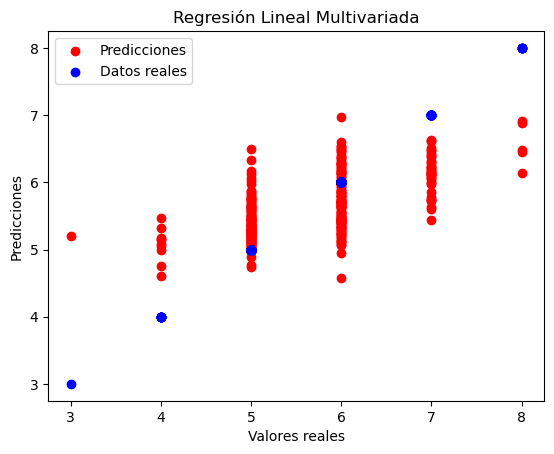

In [27]:
X = df[['alcohol', 'volatile acidity', 'sulphates']]
y = df['quality']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes de regresión
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar las predicciones vs los valores reales en el conjunto de prueba
plt.scatter(y_test, y_pred, label='Predicciones', color='red')  # Puntos de predicción
plt.scatter(y_test, y_test, label='Datos reales', color='blue')  # Puntos de datos reales
plt.legend()
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal Multivariada')
plt.show()

In [33]:
# Calcular métricas
ECM = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercepto = model.intercept_

# Imprimir resultados
print("="*60)
print("📊 Evaluación del Modelo de Regresión Lineal Multivariada")
print("="*60)
print(f"🔹 Error Cuadrático Medio (ECM):         {ECM:.3f}")
print(f"🔹 Coeficiente de Determinación (R²):    {r2:.3f}")
print(f"🔹 Intersección del modelo (Intercepto): {intercepto:.3f}")
print("\n📈 Coeficientes de Regresión:\n")
print(coefficients.to_string(index=True))
print("="*60)

📊 Evaluación del Modelo de Regresión Lineal Multivariada
🔹 Error Cuadrático Medio (ECM):         0.401
🔹 Coeficiente de Determinación (R²):    0.387
🔹 Intersección del modelo (Intercepto): 2.591

📈 Coeficientes de Regresión:

                  Coefficient
alcohol              0.310766
volatile acidity    -1.158277
sulphates            0.621589
